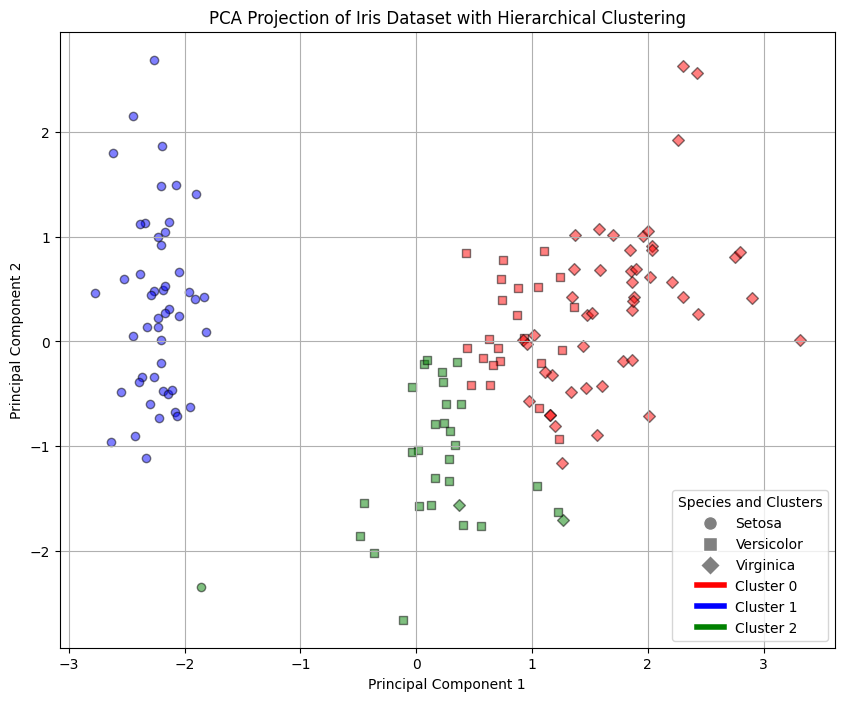

Percentage Accuracy of Hierarchical Clustering: 82.67%

Points whose cluster membership differs from their labeled class membership:
          PC1       PC2     Species  Cluster Predicted Species
41  -1.858122 -2.337415      setosa        2        versicolor
50   1.101781  0.862972  versicolor        0         virginica
51   0.731337  0.594615  versicolor        0         virginica
52   1.240979  0.616298  versicolor        0         virginica
54   1.075475 -0.208421  versicolor        0         virginica
56   0.746530  0.773019  versicolor        0         virginica
58   0.927902  0.032226  versicolor        0         virginica
61   0.440693 -0.063295  versicolor        0         virginica
63   0.719562 -0.186225  versicolor        0         virginica
65   0.875407  0.509064  versicolor        0         virginica
70   0.737683  0.396572  versicolor        0         virginica
71   0.476287 -0.417320  versicolor        0         virginica
72   1.234178 -0.933326  versicolor        0    

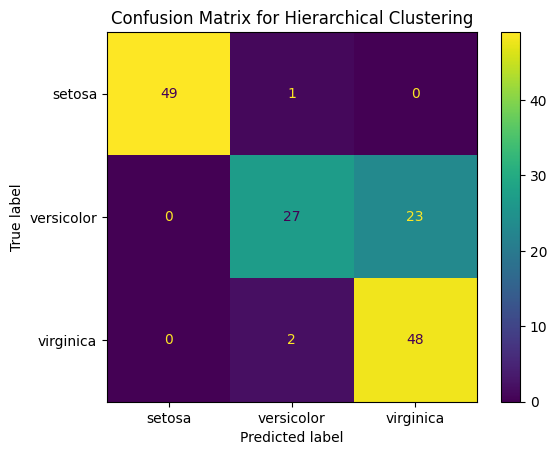

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
data = iris.data
species = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Perform hierarchical clustering
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = hierarchical_clustering.fit_predict(data_std)

# Project the data onto two dimensions using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

# Create a DataFrame for easier plotting
df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df['Species'] = [species_names[i] for i in species]
df['Cluster'] = labels

# Plotting
plt.figure(figsize=(10, 8))

# Define shapes for each species
shapes = {'setosa': 'o', 'versicolor': 's', 'virginica': 'D'}
colors = ['red', 'blue', 'green']

# Overlay cluster memberships with colors
for i in range(n_clusters):
    cluster_subset = df[df['Cluster'] == i]
    for index, row in cluster_subset.iterrows():
        plt.scatter(row['PC1'], row['PC2'], color=colors[i], edgecolor='k', alpha=0.5,  marker=shapes[row['Species']])  

# Create legend handles for species and clusters
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Setosa'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=10, label='Versicolor'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='gray', markersize=10, label='Virginica'),
    plt.Line2D([0], [0], color='red', lw=4, label='Cluster 0'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Cluster 1'),
    plt.Line2D([0], [0], color='green', lw=4, label='Cluster 2')
]

# Final plot adjustments
plt.title('PCA Projection of Iris Dataset with Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=handles, title="Species and Clusters")
plt.grid()
plt.show()

# Comparison of clusters and original labels
cluster_to_species = {0: 'virginica', 1: 'setosa', 2: 'versicolor'}
df['Predicted Species'] = df['Cluster'].map(cluster_to_species)

# Calculate the accuracy
correctly_classified = (df['Species'] == df['Predicted Species']).sum()
total_points = df.shape[0]
accuracy = (correctly_classified / total_points) * 100

# Display results
print(f"Percentage Accuracy of Hierarchical Clustering: {accuracy:.2f}%")
print("\nPoints whose cluster membership differs from their labeled class membership:")
discrepancies = df[df['Species'] != df['Predicted Species']]
print(discrepancies[['PC1', 'PC2', 'Species', 'Cluster', 'Predicted Species']])

# Confusion Matrix
conf_matrix = confusion_matrix(df['Species'], df['Predicted Species'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=species_names)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Hierarchical Clustering')
plt.show()


In [23]:
print( pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
